In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df = pd.read_csv("titanic_data.csv") # creating  titanic dataframe
print(f"Shape : {df.shape}")
print(f"Columns : {df.columns}")

Shape : (418, 12)
Columns : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h3>Process : Cleaning </h3>

-> As we can see the data has null values

In [29]:
# Check missing data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
# Fill 'Age' with median or mean
df["Age"] = df["Age"].fillna(df["Age"].mean())

# Fill 'Embarked' with mode (most frequent)
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<Axes: xlabel='Survived', ylabel='count'>

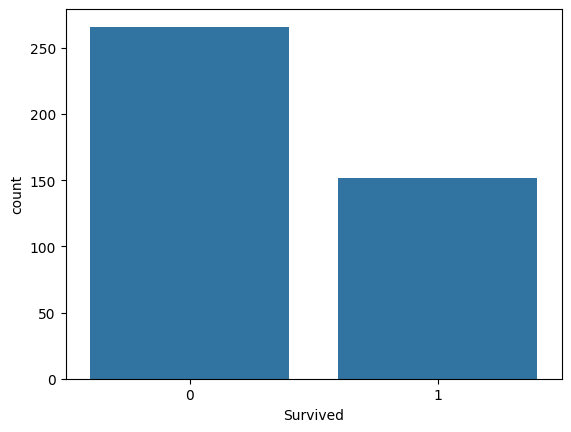

In [35]:
sns.countplot(x='Survived', data=df)  # Target variable

<Axes: xlabel='Sex', ylabel='count'>

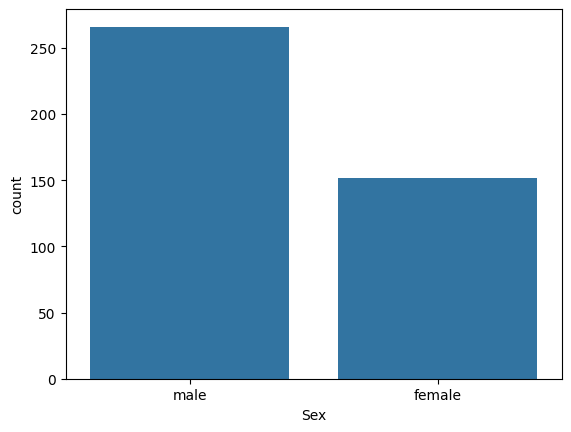

In [37]:
sns.countplot(x='Sex', data=df)


<Axes: xlabel='Pclass', ylabel='count'>

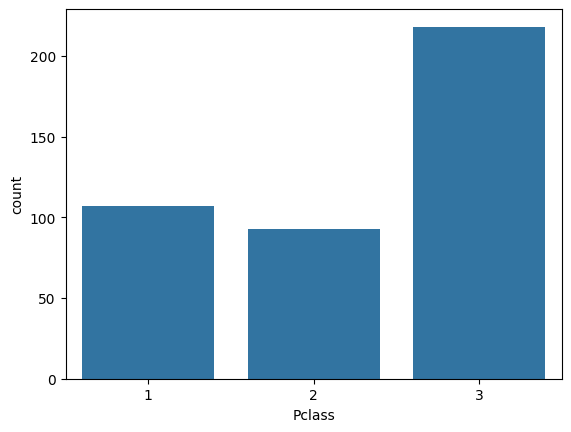

In [38]:
sns.countplot(x='Pclass', data=df)


<Axes: xlabel='Embarked', ylabel='count'>

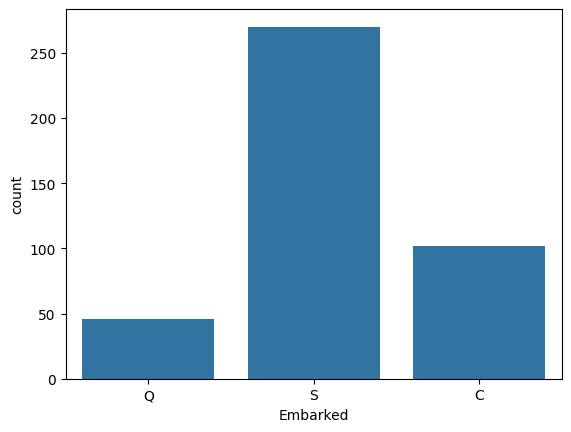

In [39]:
sns.countplot(x='Embarked', data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

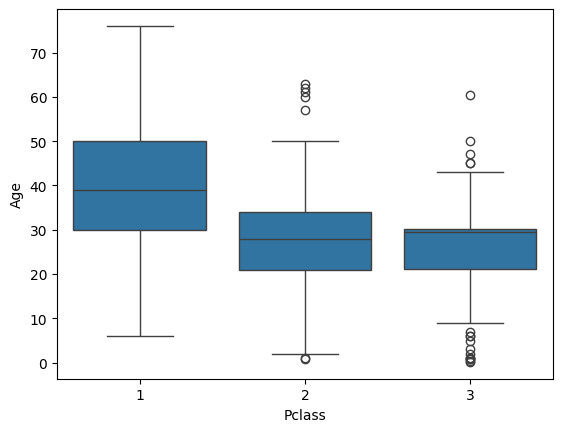

In [40]:
sns.boxplot(x='Pclass', y='Age', data=df)


<Axes: xlabel='Age', ylabel='Count'>

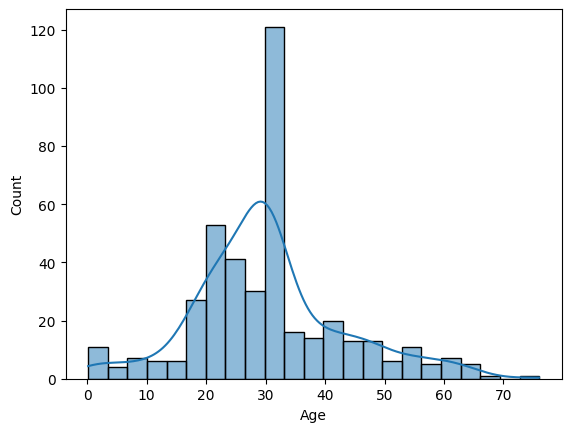

In [41]:
sns.histplot(df['Age'], kde=True)

# Bivariate Analysis (2 Features Together)

Text(0.5, 1.0, 'Survival Rate by Sex')

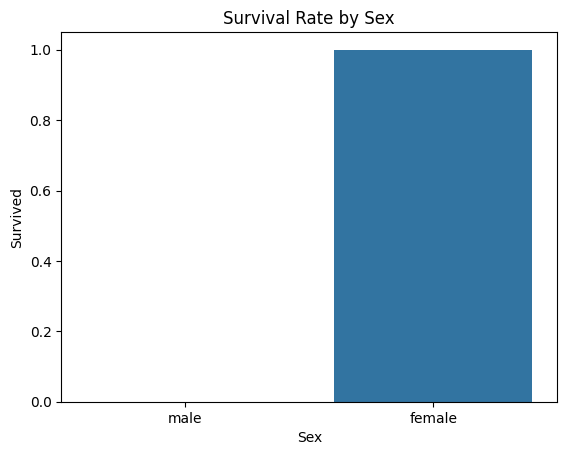

In [44]:
sns.barplot(x='Sex', y='Survived', data = df)
plt.title("Survival Rate by Sex")

Text(0.5, 1.0, 'Survival Rate by Passenger Class')

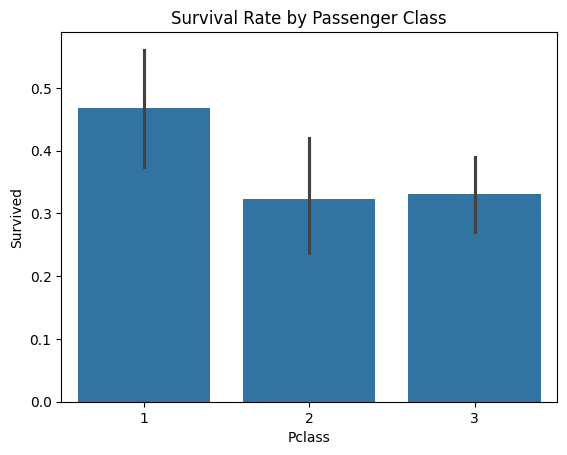

In [46]:
sns.barplot(x='Pclass', y='Survived', data = df)
plt.title("Survival Rate by Passenger Class")

Text(0.5, 1.0, 'Age vs Survival')

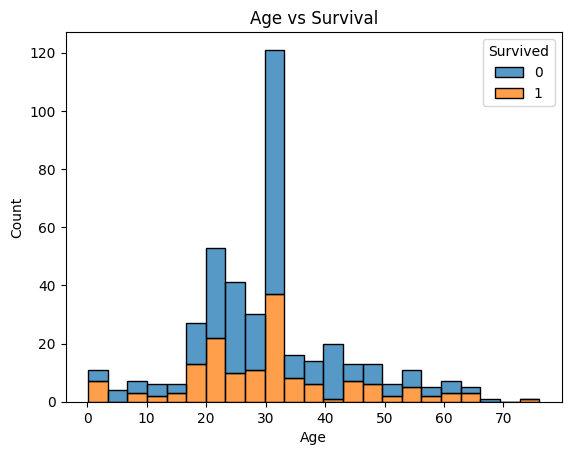

In [47]:
sns.histplot(data = df, x='Age', hue='Survived', multiple='stack')
plt.title("Age vs Survival")

Text(0.5, 1.0, 'Correlation Heatmap')

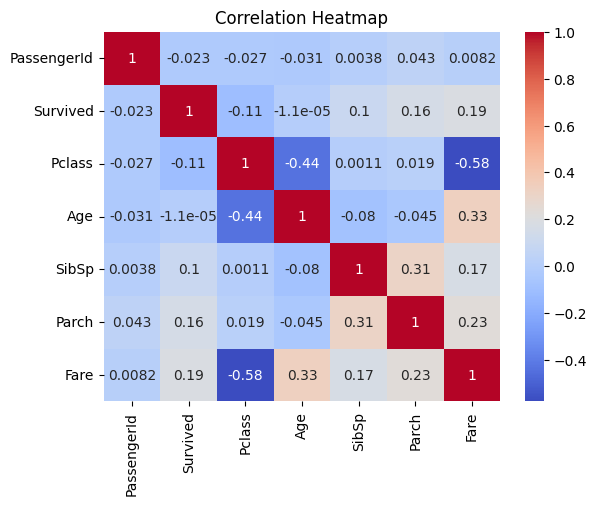

In [52]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [55]:
import pandas as pd
import folium

# Sample: Load Titanic dataset
train = df

# Step 1: Count passengers from each embarkation port
embark_counts = train['Embarked'].value_counts()

# Step 2: Create dictionary of port names with coordinates
embark_ports = {
    'C': {'name': 'Cherbourg',   'coords': (49.6333, -1.6167)},
    'Q': {'name': 'Queenstown',  'coords': (51.8496, -8.2948)},
    'S': {'name': 'Southampton', 'coords': (50.9097, -1.4044)},
}

# Step 3: Create base map
mapp = folium.Map(location=[51, 0], zoom_start=4, tiles="CartoDB positron")

# Step 4: Add markers
for port_code, data in embark_ports.items():
    count = embark_counts.get(port_code, 0)
    folium.CircleMarker(
        location=data['coords'],
        radius=10 + count / 20,  # scale size
        popup=f"{data['name']} ({port_code}): {count} passengers",
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(mapp)

# Display the map
mapp


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\DELL\AppData\Local\Temp\ipykernel_12768\594757709.py:3: SyntaxWarning: invalid escape sequence '\.'
  train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


<Axes: xlabel='Title', ylabel='Survived'>

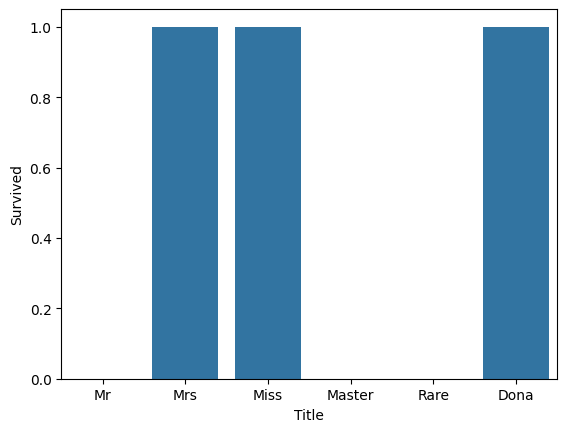

In [54]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify titles
train['Title'] = train['Title'].replace(['Mlle','Ms','Mme'], 'Miss')
train['Title'] = train['Title'].replace(['Dr','Major','Col','Sir','Capt','Rev','Don'], 'Rare')

sns.barplot(x='Title', y='Survived', data=train)
